In [1]:
%%time
import cv2
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import noise
from colorsys import *
import math

from mesh import Mesh


%matplotlib inline
%config InlineBackend.figure_format = 'png'

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20

MAP_SIZE = 256
DOTS_DENSITY = 0.017

DOTS_AMOUNT = int(MAP_SIZE * MAP_SIZE * DOTS_DENSITY)
TECTONIC_PLATES_AMOUNT = 6\
    
print("DOTS_AMOUNT =", DOTS_AMOUNT)


def shimg(img, name):
    cv2.imwrite(f"img_out/{name}.png", cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    plt.imshow(img)
    plt.show()

DOTS_AMOUNT = 1114
Wall time: 266 ms


Generating mesh


kwa
Allocating image


Drawing image


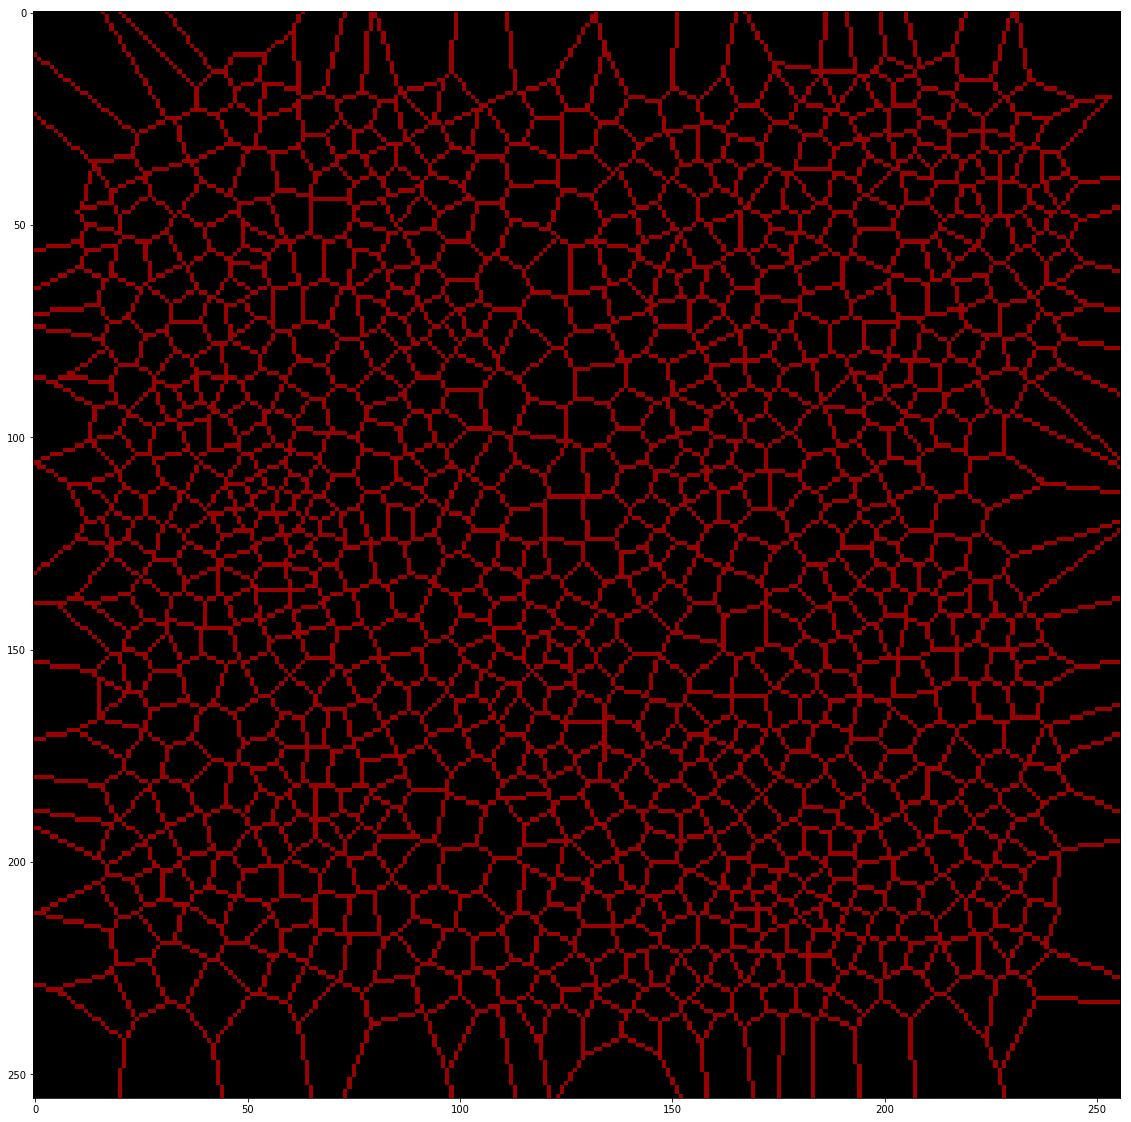

Wall time: 661 ms


In [2]:
%%time

print("Generating mesh", flush=True)
mesh = Mesh(dimensions=(MAP_SIZE, MAP_SIZE), npoints=DOTS_AMOUNT, relax_steps=2)

print("Allocating image", flush=True)
img = np.zeros((MAP_SIZE, MAP_SIZE, 3), np.uint8)

print("Drawing image", flush=True)
for i in range(len(mesh.ridge_vertices)):
    if mesh.ridge_vertices[i][0] < 0:
        continue
    coordinates = mesh.vertices[mesh.ridge_vertices[i]]
    cv2.line(img, tuple(coordinates[0].astype(int)), tuple(coordinates[1].astype(int)), (153, 0, 0), 1)

shimg(img, "mesh")

Drawing background


Generating plates


as [610, 394, 400, 402, 734, 295, 296, 300, 302, 497, 308, 511, 801, 810, 811, 814, 815, 819, 419, 358, 364, 173, 175, 565, 192, 199, 201, 184, 187, 189, 191, 130, 131, 42, 43, 242, 853, 764, 765]
Drawing AS


Drawing plates


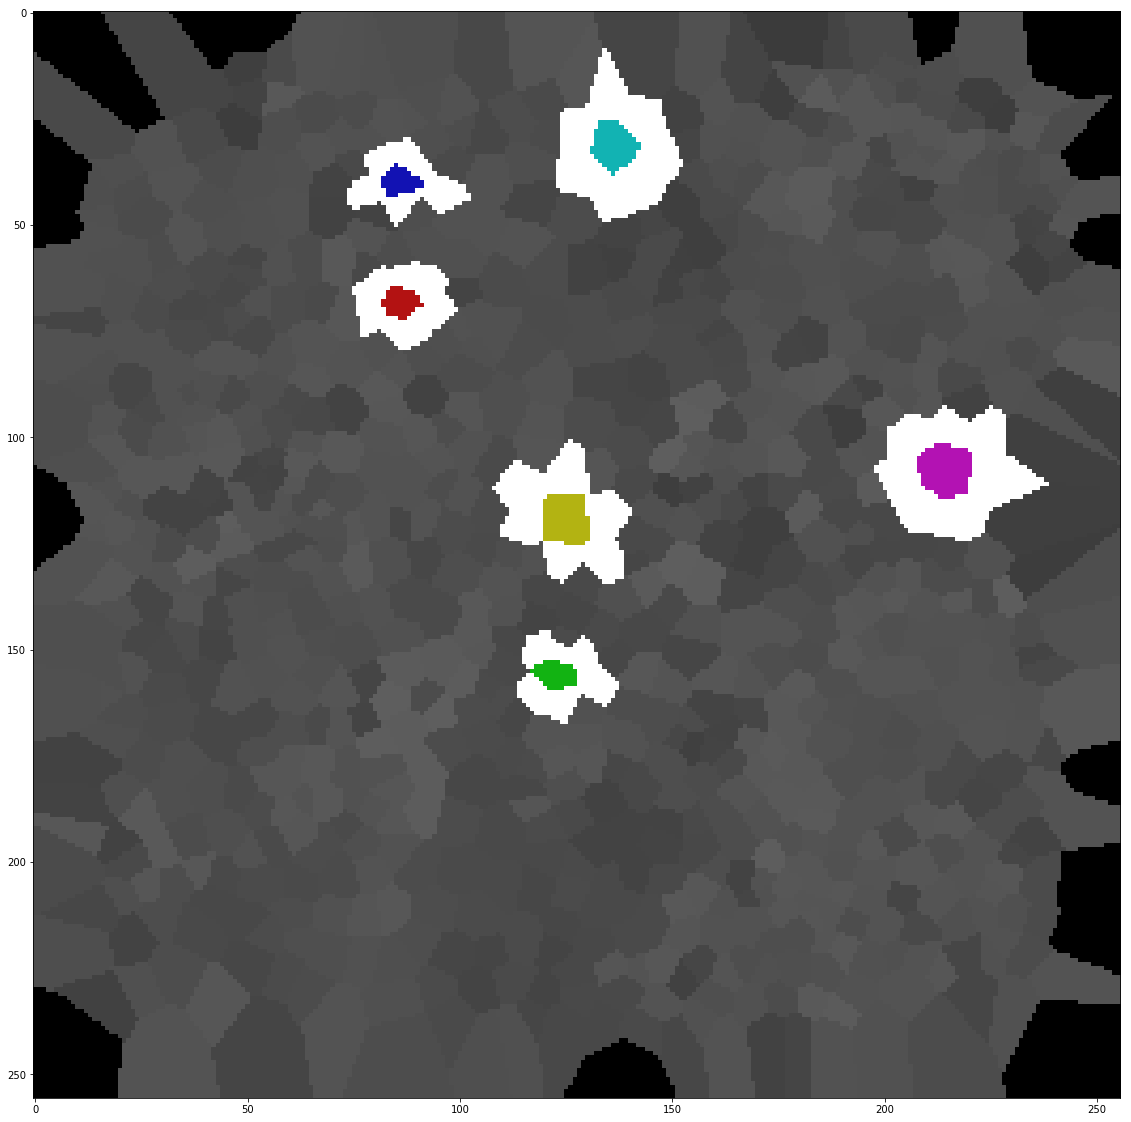

Wall time: 412 ms


In [3]:
%%time

img = np.zeros((MAP_SIZE, MAP_SIZE, 3), np.uint8)
mesh.create_noise()


def create_tectonic_plates(mesh: Mesh, n: int):    
    spread_p = np.random.uniform(0.5, 1.0, n)
    plates = np.random.choice(np.arange(len(mesh.points)), n, replace=False).reshape((n, 1))

    active_set = [n for region in plates for r in region for n in list(mesh.neighbors[r])]
    
    return plates, active_set
    # return plates


print("Drawing background", flush=True)
for i in range(len(mesh.regions)):
    if -1 in mesh.regions[i]:
        continue

    coordinates = mesh.vertices[mesh.regions[i]]
    lvl = mesh.noise[i] * 51 + 51
    cv2.fillConvexPoly(img, coordinates.astype('int32'), (lvl, lvl, lvl))

print("Generating plates", flush=True)    
plates, active_set = create_tectonic_plates(mesh, TECTONIC_PLATES_AMOUNT)

print("Drawing active set", flush=True)
for i, point in enumerate(active_set):
    coordinates = mesh.vertices[mesh.regions[mesh.point_region[point]]]
    cv2.fillConvexPoly(img, coordinates.astype('int32'), (255, 255, 255))
print("Drawing plates", flush=True)
for i, plate in enumerate(plates):
    (r, g, b) = tuple(c * 256 for c in hsv_to_rgb(float(i) / len(plates), 0.9, 0.7))
    for point in plate:
        coordinates = mesh.vertices[mesh.regions[mesh.point_region[point]]]
        cv2.fillConvexPoly(img, coordinates.astype('int32'), (b, g, r))

shimg(img, "plates")

a
b
c


d


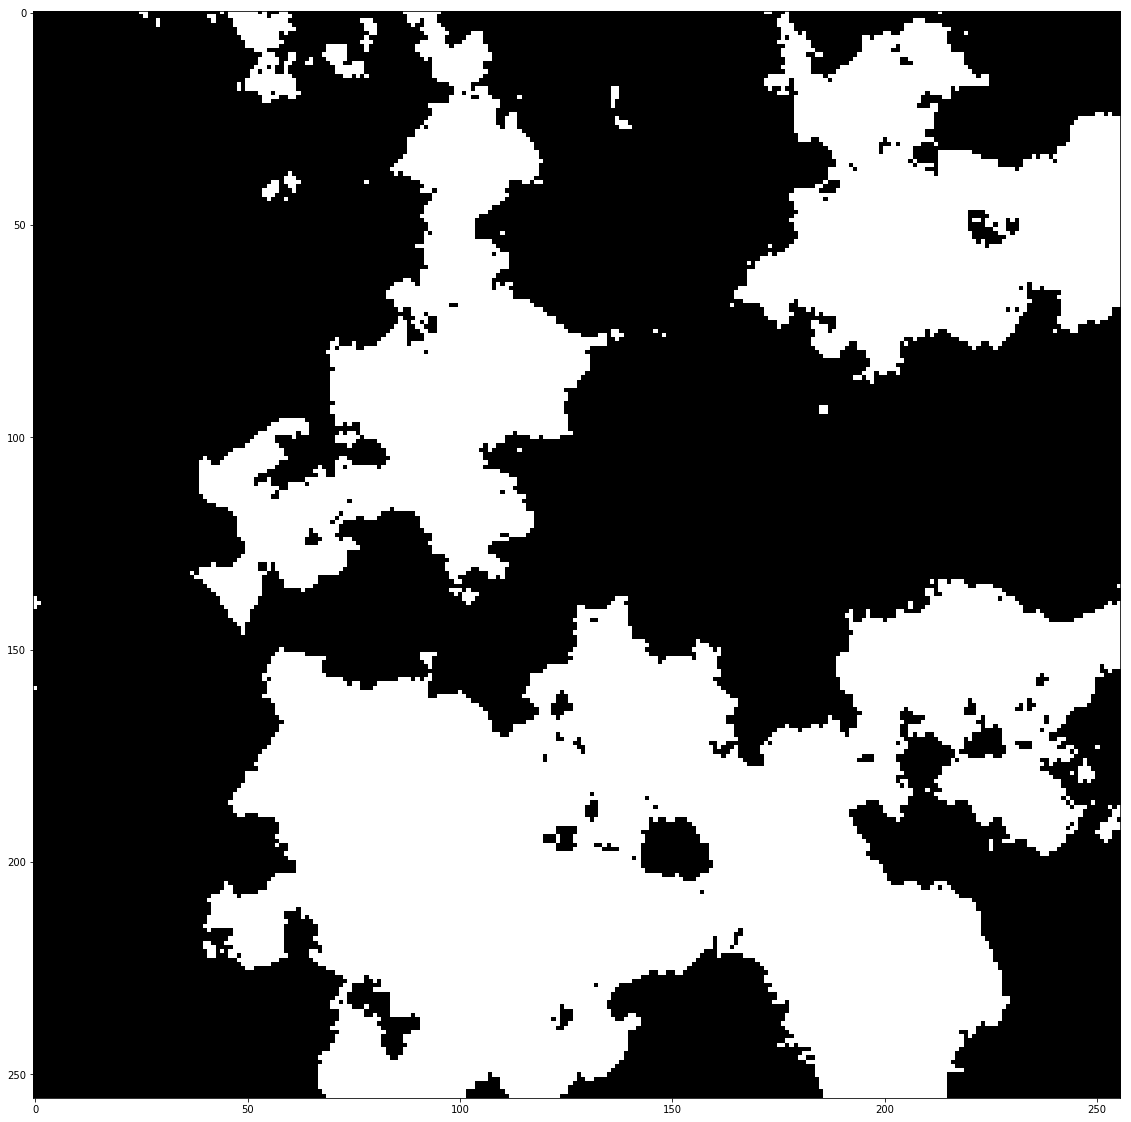

Wall time: 786 ms


In [16]:
%%time

scale = 128.0
octaves = 16
persistence = 0.6
lacunarity = 1.9
levl = 0.40

colormap = LinearSegmentedColormap(
    'TerrainCmap', {
        'red': (
            (0.00, 0.00, 0.00),
            (levl, 0.00, 1.00),
            (1.00, 1.00, 1.00),
        ),

        'green': (
            (0.00, 0.00, 0.00),
            (levl, 0.00, 1.00),
            (1.00, 1.00, 1.00),
        ),

        'blue': (
            (0.00, 0.00, 0.00),
            (levl, 0.00, 1.00),
            (1.00, 1.00, 1.00),
        ),
    })

print('a')
img = np.zeros((MAP_SIZE, MAP_SIZE), np.float32)
print('b')
for i in range(MAP_SIZE):
    for j in range(MAP_SIZE):
        val = noise.snoise2(i / scale,
                            j / scale,
                            octaves=octaves,
                            persistence=persistence,
                            lacunarity=lacunarity,
                            base=0)
        img[i][j] = ((val + 1) / 2.0)**2
print('c')
plt.imshow(img, cmap=colormap)
print('d')
plt.show()